### 3. Feature Extraction (featureExtraction.ipynb)

# Feature Extraction Methods
Feature extraction is a key step in machine learning and data preprocessing. It transforms the data into a lower-dimensional space while retaining important information.

In this notebook, we will cover:
1. Linear methods:
   - Principal Component Analysis (PCA)
   - Linear Discriminant Analysis (LDA)
2. Nonlinear methods:
   - Independent Component Analysis (ICA)
   - Isomap and Multidimensional Scaling (MDS)


# Feature Extraction: Linear Methods

## 1. Principal Component Analysis (PCA)

### Explanation
Principal Component Analysis (PCA) is a widely used statistical technique for dimensionality reduction. It projects data onto a set of orthogonal axes, called principal components, which capture the maximum variance in the data.

### Key Steps
1. Standardize the data.
2. Compute the covariance matrix.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Project the data onto the top $k$ eigenvectors corresponding to the largest eigenvalues.

### Formula
The PCA transformation can be expressed as:
$Z = X W$
Where:
- $X$: Original data matrix (centered).
- $W$: Matrix of eigenvectors (principal components).
- $Z$: Transformed data in the reduced-dimensional space.

### Example
Below is an example of applying PCA on synthetic data and visualizing the results:



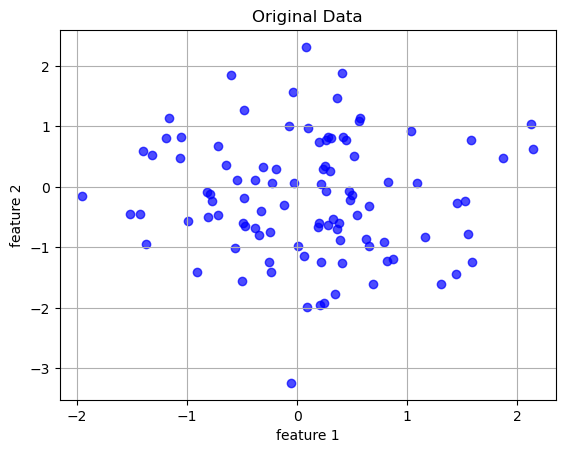

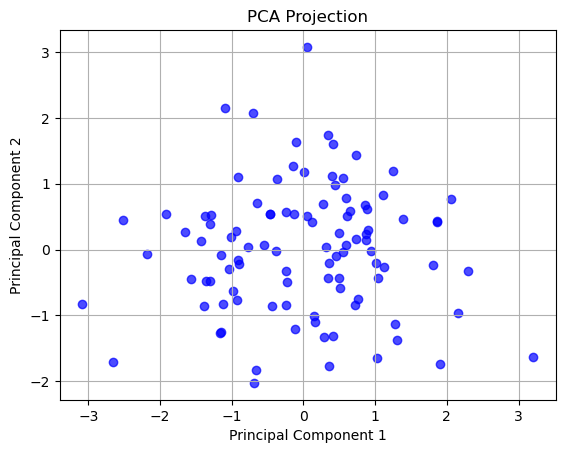

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100, 3)
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.7)
plt.title("Original Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.grid()
plt.show()
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

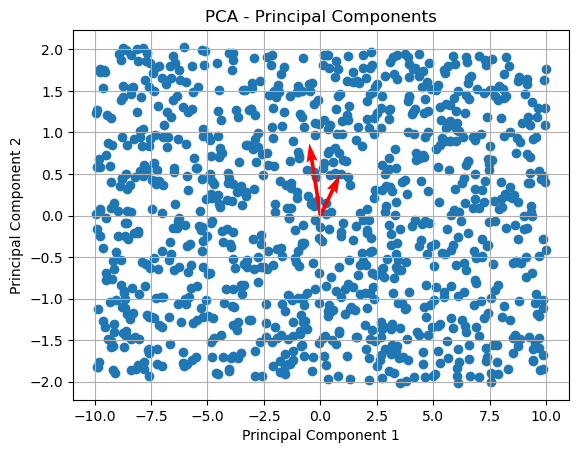

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_samples = 1000  # تعداد نقاط
width = 4  # عرض مستطیل
height = 10  # ارتفاع مستطیل
rotation_angle = np.pi / 6  # زاویه چرخش (مثلاً 30 درجه)

# تولید نقاط در محدوده مستطیل
x = np.random.uniform(-width / 2, width / 2, n_samples)
y = np.random.uniform(-height , height , n_samples)

rect_data = np.column_stack((x, y))

# ایجاد ماتریس چرخش
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)]
])

# اعمال چرخش روی نقاط مستطیل
rotated_data = rect_data @ rotation_matrix.T
data = rotated_data
#data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)


principal_components = pca.components_


plt.scatter(pca_result[:, 0], pca_result[:, 1], label='Data Points')
origin = np.zeros((2,))  
for i in range(len(principal_components)):
    plt.quiver(origin[0], origin[1], principal_components[i, 0], principal_components[i, 1], angles='xy', scale_units='xy', scale=1, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Principal Components')
plt.grid(True)
plt.show()


## 2. Linear Discriminant Analysis (LDA)

### Explanation
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique. It aims to maximize the separation between multiple classes by projecting the data onto a lower-dimensional space.

### Key Steps
1. Compute the within-class scatter matrix ($S_W$).
2. Compute the between-class scatter matrix ($S_B$).
3. Find the eigenvalues and eigenvectors of $S_W^{-1} S_B\).
4. Select the top eigenvectors for projection.

### Formula
The optimal projection matrix \(W\) is given by:
$W = \text{argmax}_W \frac{|W^T S_B W|}{|W^T S_W W|}
$
Where:
- $S_W$: Within-class scatter matrix.
- $S_B$: Between-class scatter matrix.

### Example
Below is an example of applying LDA to synthetic data:




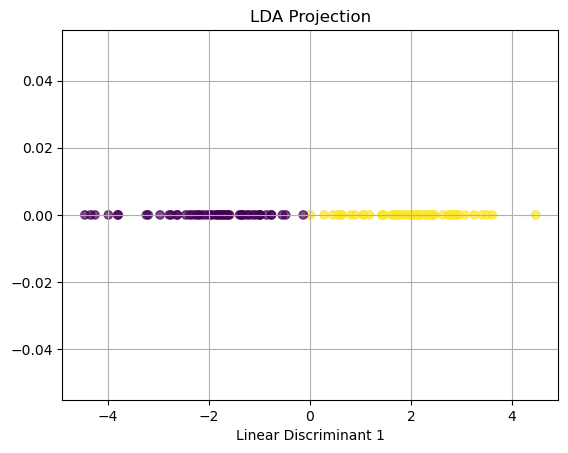

In [3]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plot results
import matplotlib.pyplot as plt
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis', alpha=0.7)
plt.title("LDA Projection")
plt.xlabel("Linear Discriminant 1")
plt.grid()
plt.show()

## 3. Nonlinear Methods

Nonlinear methods are used for dimensionality reduction when the data lies on a nonlinear manifold. These techniques aim to preserve the intrinsic structure of the data in a lower-dimensional space.

---

### 3.1 Independent Component Analysis (ICA)

#### Explanation
Independent Component Analysis (ICA) is a technique used to separate multivariate signals into additive subcomponents. It assumes that the subcomponents are non-Gaussian and statistically independent. ICA is widely used in applications like source separation (e.g., separating audio signals).

#### Key Steps
1. Center and whiten the data.
2. Maximize the statistical independence of components using measures like kurtosis or negentropy.
3. Extract the independent components.

#### Formula
The ICA model can be represented as:
\[
X = AS
\]
Where:
- \(X\): Observed data matrix.
- \(A\): Mixing matrix.
- \(S\): Independent components.

The goal is to estimate \(S\) and \(A\) such that the components in \(S\) are independent.

#### Example
Below is an example of applying ICA to separate mixed signals:


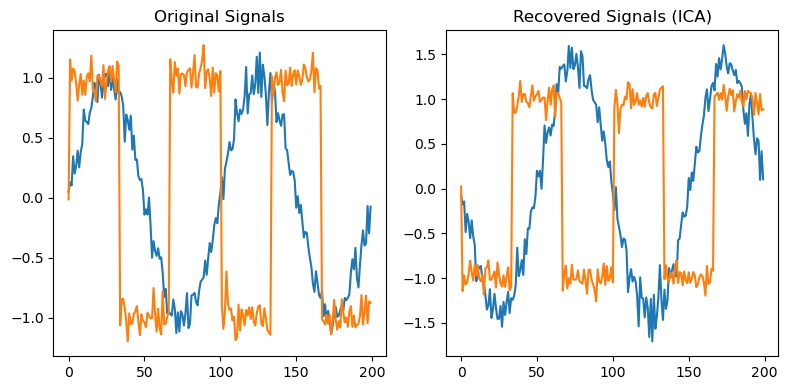

In [4]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Generate synthetic signals
np.random.seed(42)
S = np.c_[np.sin(2 * np.pi * np.arange(200) / 100),
          np.sign(np.sin(3 * np.pi * np.arange(200) / 100))]
S += 0.1 * np.random.normal(size=S.shape)

# Mix signals
A = np.array([[1, 0.5], [0.5, 1]])
X = S.dot(A.T)

# Apply ICA
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(S)
plt.title("Original Signals")
plt.subplot(1, 2, 2)
plt.plot(S_ica)
plt.title("Recovered Signals (ICA)")
plt.tight_layout()
plt.show()


### 3.2 Isomap and Multidimensional Scaling (MDS)

#### Explanation
Isomap and Multidimensional Scaling (MDS) are nonlinear dimensionality reduction techniques used to embed high-dimensional data into a lower-dimensional space while preserving the geometric structure or pairwise distances.

- **Isomap**: Enhances classical MDS by preserving geodesic distances (shortest paths on the data manifold). It uses a k-nearest neighbors graph to compute geodesic distances.
- **MDS**: Attempts to preserve pairwise distances or dissimilarities in the reduced space.

---

#### Key Steps for Isomap
1. Construct a k-nearest neighbors graph from the data.
2. Compute geodesic distances between all pairs of data points using shortest path algorithms (e.g., Dijkstra's or Floyd-Warshall).
3. Apply classical MDS to the geodesic distance matrix to obtain the lower-dimensional embedding.

---

#### Formula for MDS
Classical MDS minimizes the stress function:
$ \text{Stress}(X) = \sum_{i < j} \left( d_{ij} - \|x_i - x_j\| \right)^2$
Where:
- $d_{ij}$: Distance between points \(i\) and \(j\) in the original space.
- $\|x_i - x_j\|$: Distance between projected points in the reduced space.

---

#### Example: Applying Isomap
```python


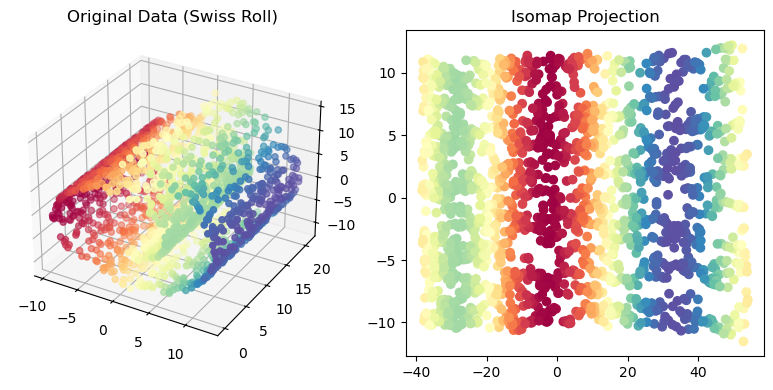

In [5]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Generate synthetic Swiss roll data
X, _ = make_swiss_roll(n_samples=2000, noise=0.05)

# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

# Plot results
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap='Spectral')
ax.set_title("Original Data (Swiss Roll)")
plt.subplot(122)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=X[:, 0], cmap='Spectral')
plt.title("Isomap Projection")
plt.tight_layout()
plt.show()


Example: Applying MDS

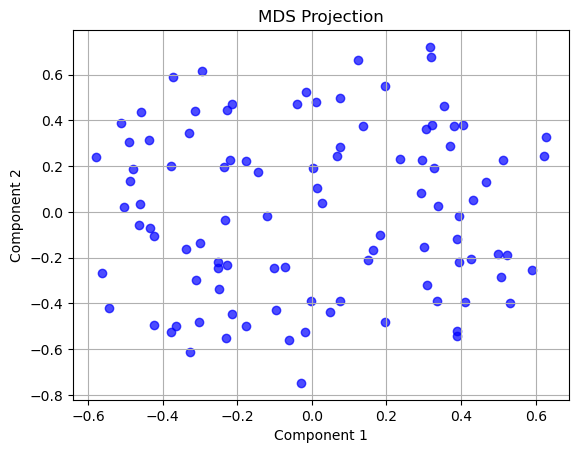

In [6]:
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Plot results
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='blue', alpha=0.7)
plt.title("MDS Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()
plt.show()


Visualization
Both Isomap and MDS enable visualizing complex high-dimensional data in a lower-dimensional space while preserving the geometric relationships:

Isomap is particularly useful for manifold learning and preserving nonlinear structures.
MDS is versatile for distance-preserving projections.
These methods are commonly used in exploratory data analysis to gain insights into the underlying structure of the data.